In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mkl

mkl.set_num_threads(2)
np.random.seed(1234)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [16, 9]

In [2]:
# arrange 2D matrices as tiles (takes 4D `examples` tensor with dims: rows x cols x tile_height x tile_width)
def tiles(examples):
    rows_count = examples.shape[0]
    cols_count = examples.shape[1]
    tile_height = examples.shape[2]
    tile_width = examples.shape[3]
    
    space_between_tiles = 2
    img_matrix = np.empty(shape=( rows_count * (tile_height + space_between_tiles), cols_count * (tile_width + space_between_tiles )))
    img_matrix.fill(np.nan)

    
    for r in range (rows_count):
        for c in range (cols_count):
            x0 = r * (tile_height + space_between_tiles)
            y0 = c * (tile_width + space_between_tiles)
            img_matrix[x0:x0+tile_height, y0:y0+tile_width] = examples[r, c]
    
    
    return img_matrix

## MNIST Dataset

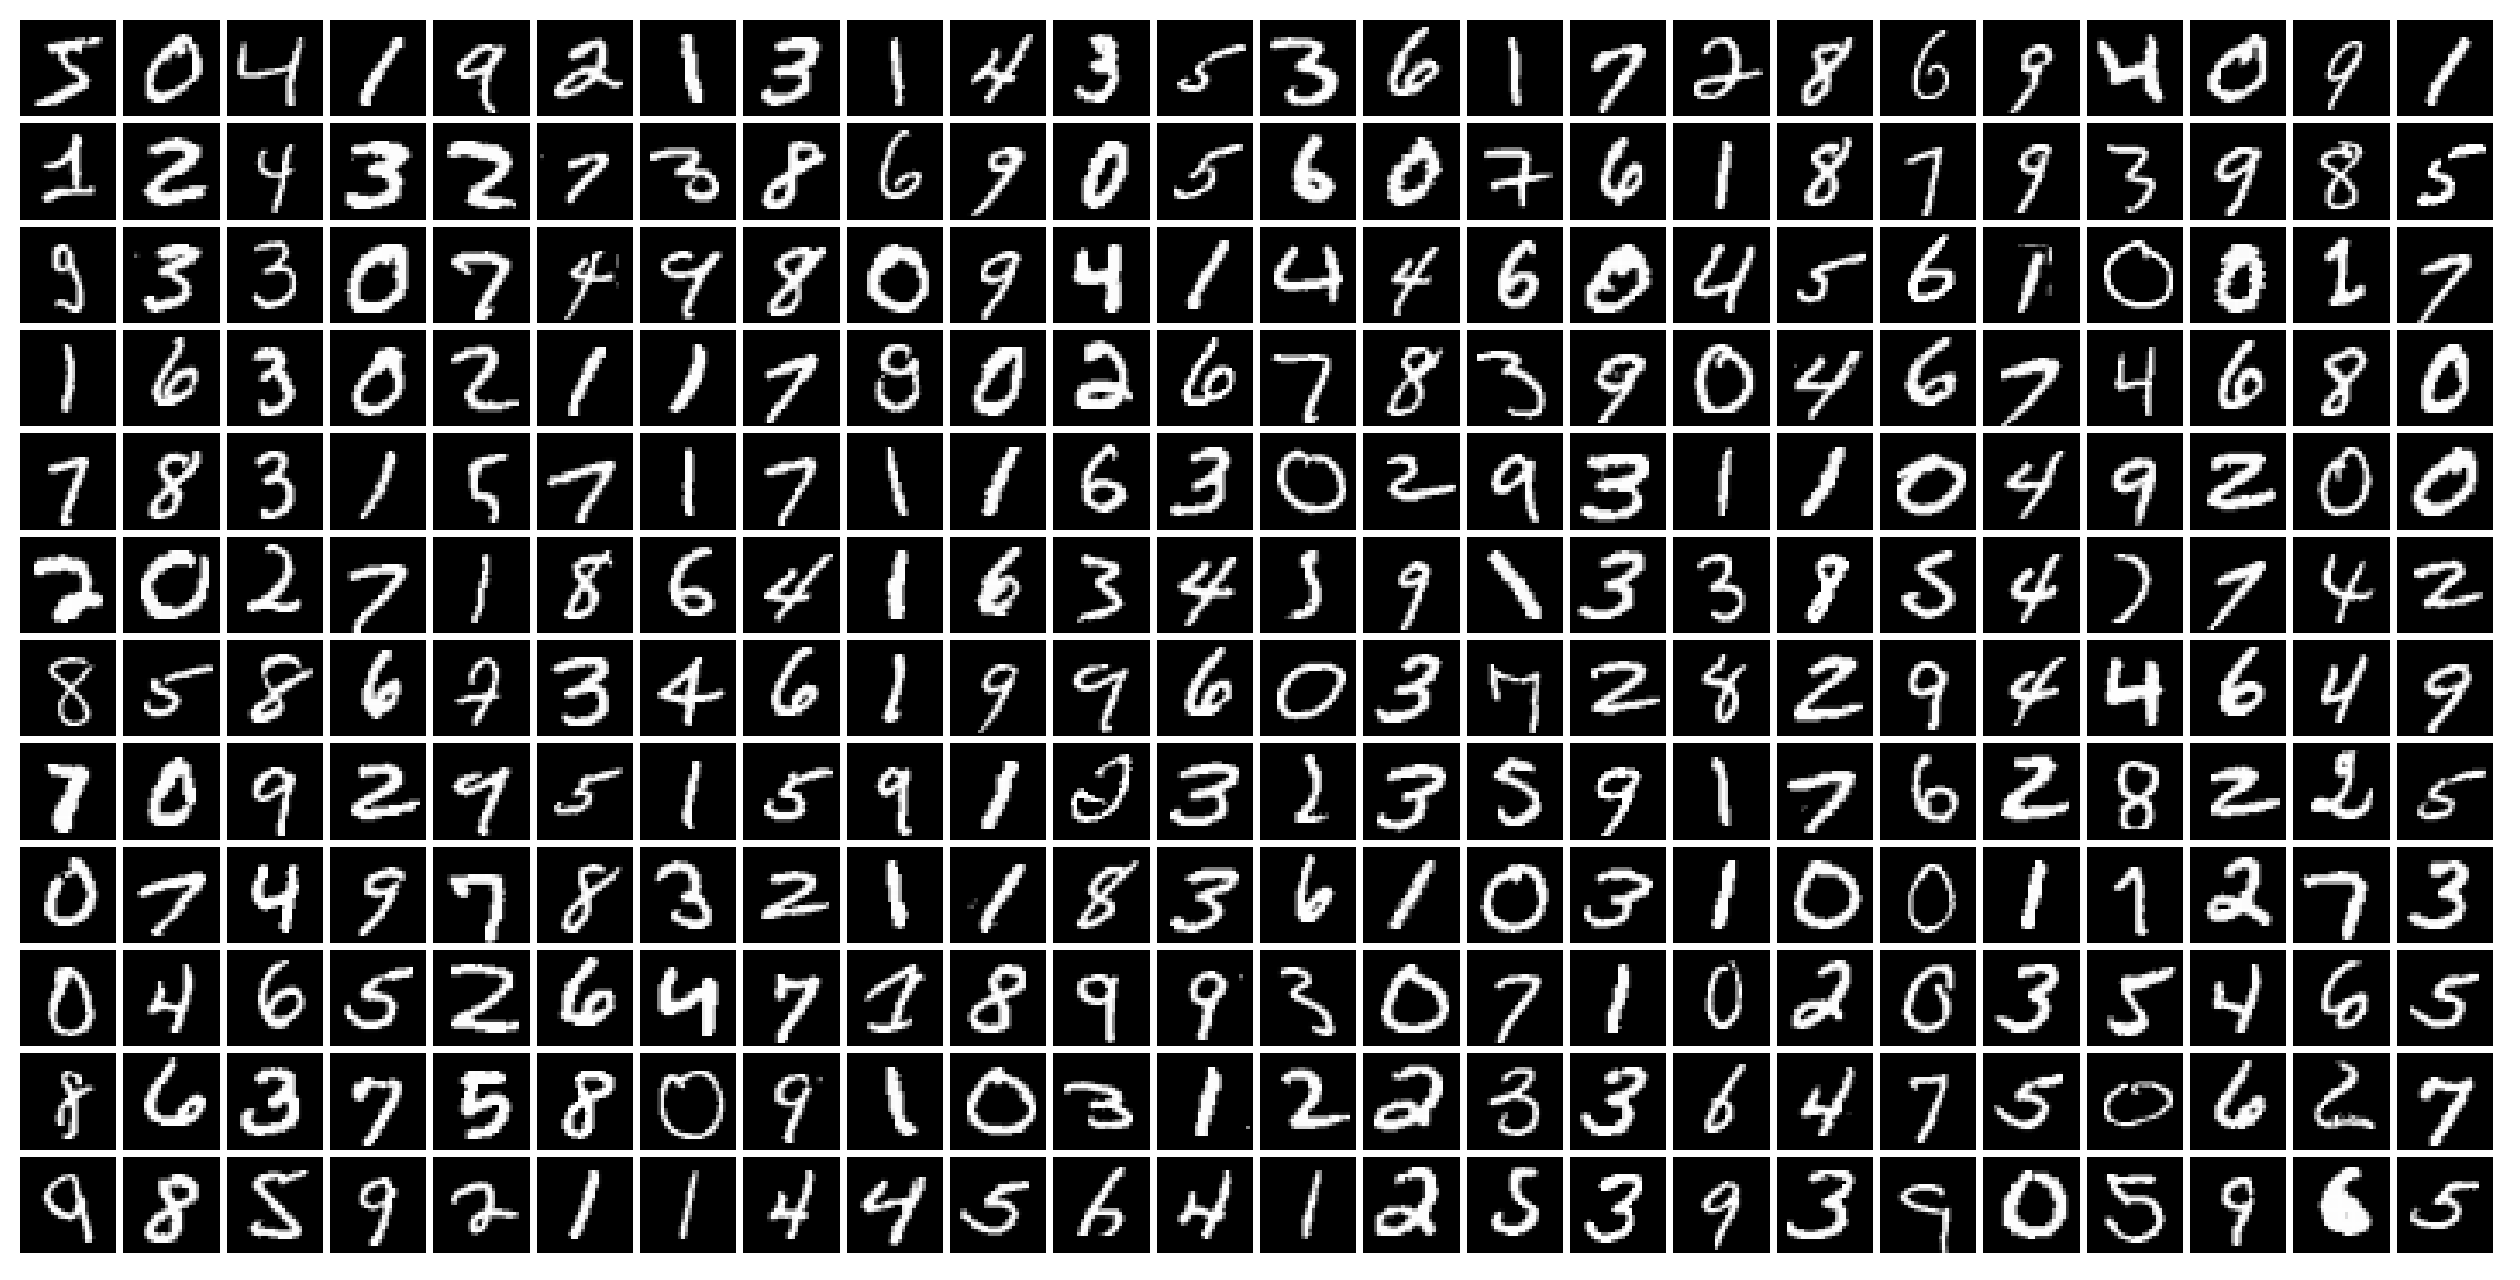

In [3]:
import mnist
digits = np.reshape(mnist.train_images()[:12*24], newshape=(12, 24, 28, 28))
img = tiles(digits)

plt.matshow(img, cmap='gray', interpolation='none')
plt.axis('off')
plt.show()

In [4]:
X = mnist.train_images().astype(np.float32) / 255.0
y = mnist.train_labels()
X.shape

(60000, 28, 28)

Reshape `X` so that the last two dimensions are collapsed into single dimension.

In [5]:
X = X.reshape(X.shape[0], -1)

In [6]:
X.shape

(60000, 784)

## Visualizing the distribution of MNIST digits

Add a scatter plot to `plot`, which:
* displys the first two dimensions of `X`,
* includes only these elements from `X` for which `y == i` (i.e. elements from the i-th class),
* includes label (i.e. `i`) in the legend.


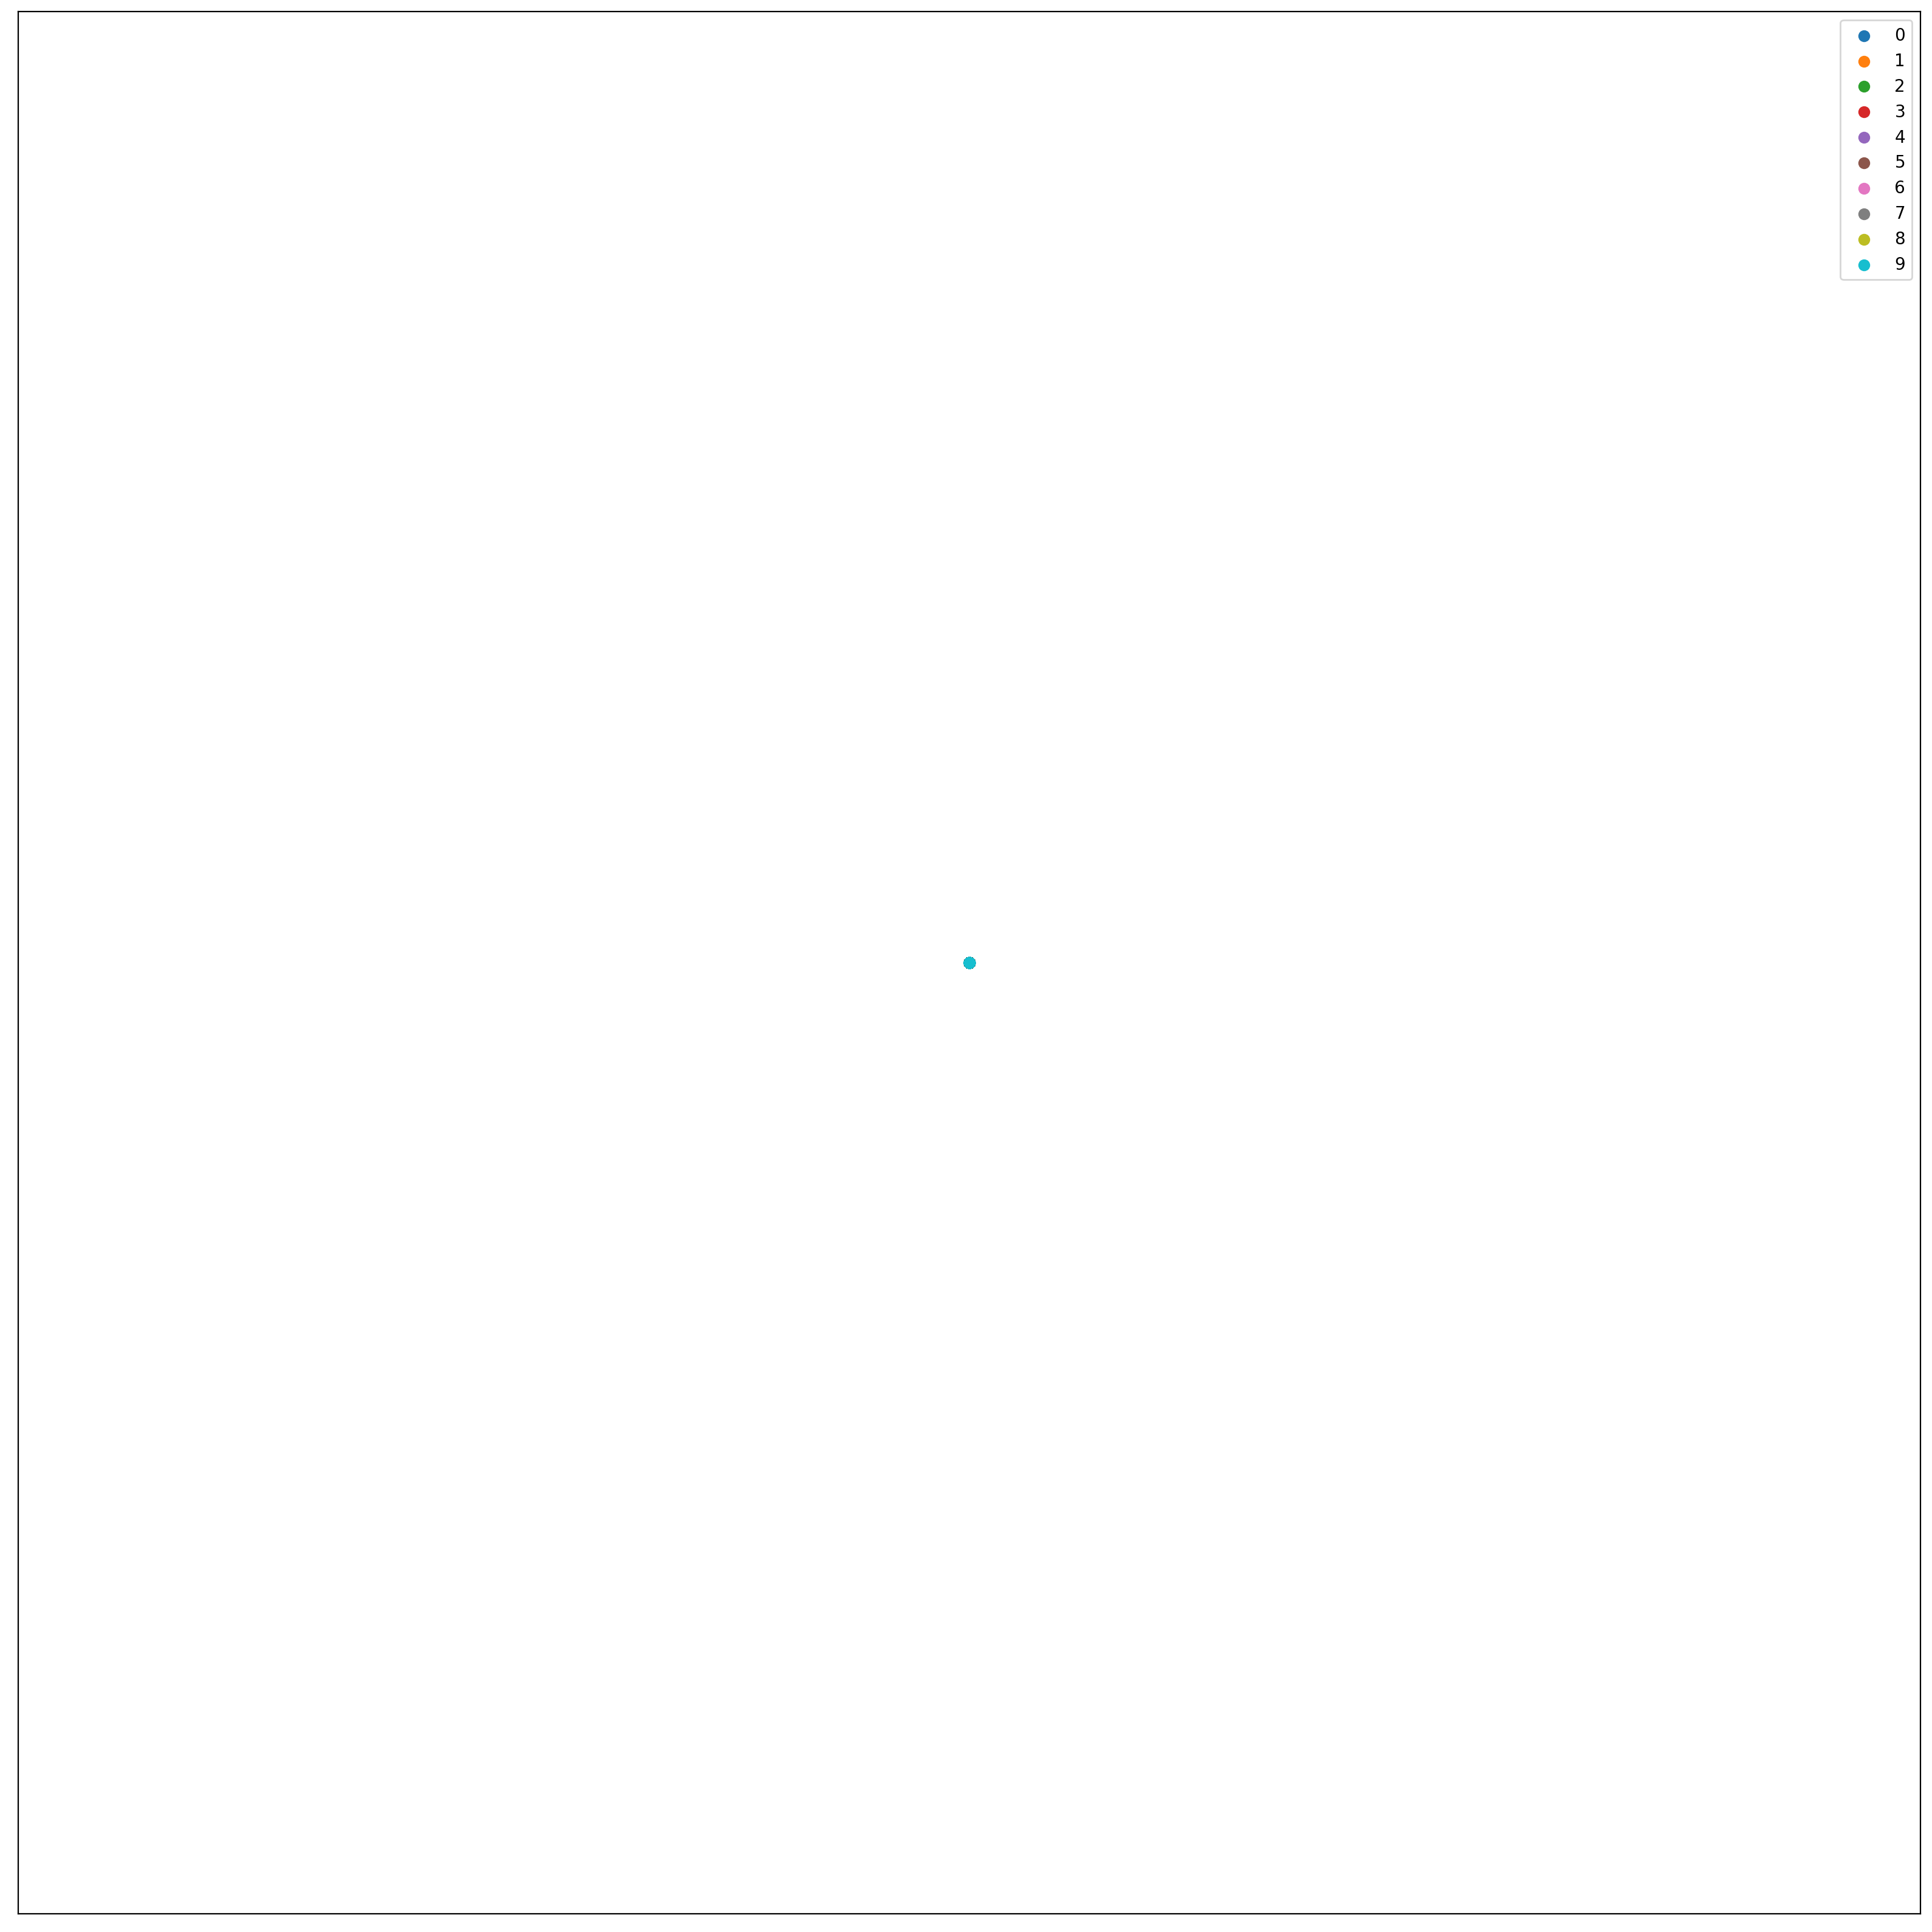

In [8]:
def plot_2d_mnist_scatter(X, y):
    fig, plot = plt.subplots()
    fig.set_size_inches(16, 16)
    plt.prism()

    for i in range(10):
        digit_indeces = (i == y)
        dim1 = X[digit_indeces, 0]
        dim2 = X[digit_indeces, 1]
        plot.scatter(dim1, dim2, label=i)
        

    plot.set_xticks(())
    plot.set_yticks(())

    plt.tight_layout()
    plt.legend()
    plt.show()
plot_2d_mnist_scatter(X, y)

### Principal Component Analysis (PCA)

In [9]:
SAMPLES_LIMIT = 2000
X_small = X[:SAMPLES_LIMIT]
y_small = y[:SAMPLES_LIMIT]

Use PCA function to embed `X_small` in two dimensions. Store the result in `X_pca_embedded`.

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca_embedded = pca.fit_transform(X_small)


In [11]:
X_pca_embedded.shape

(2000, 2)

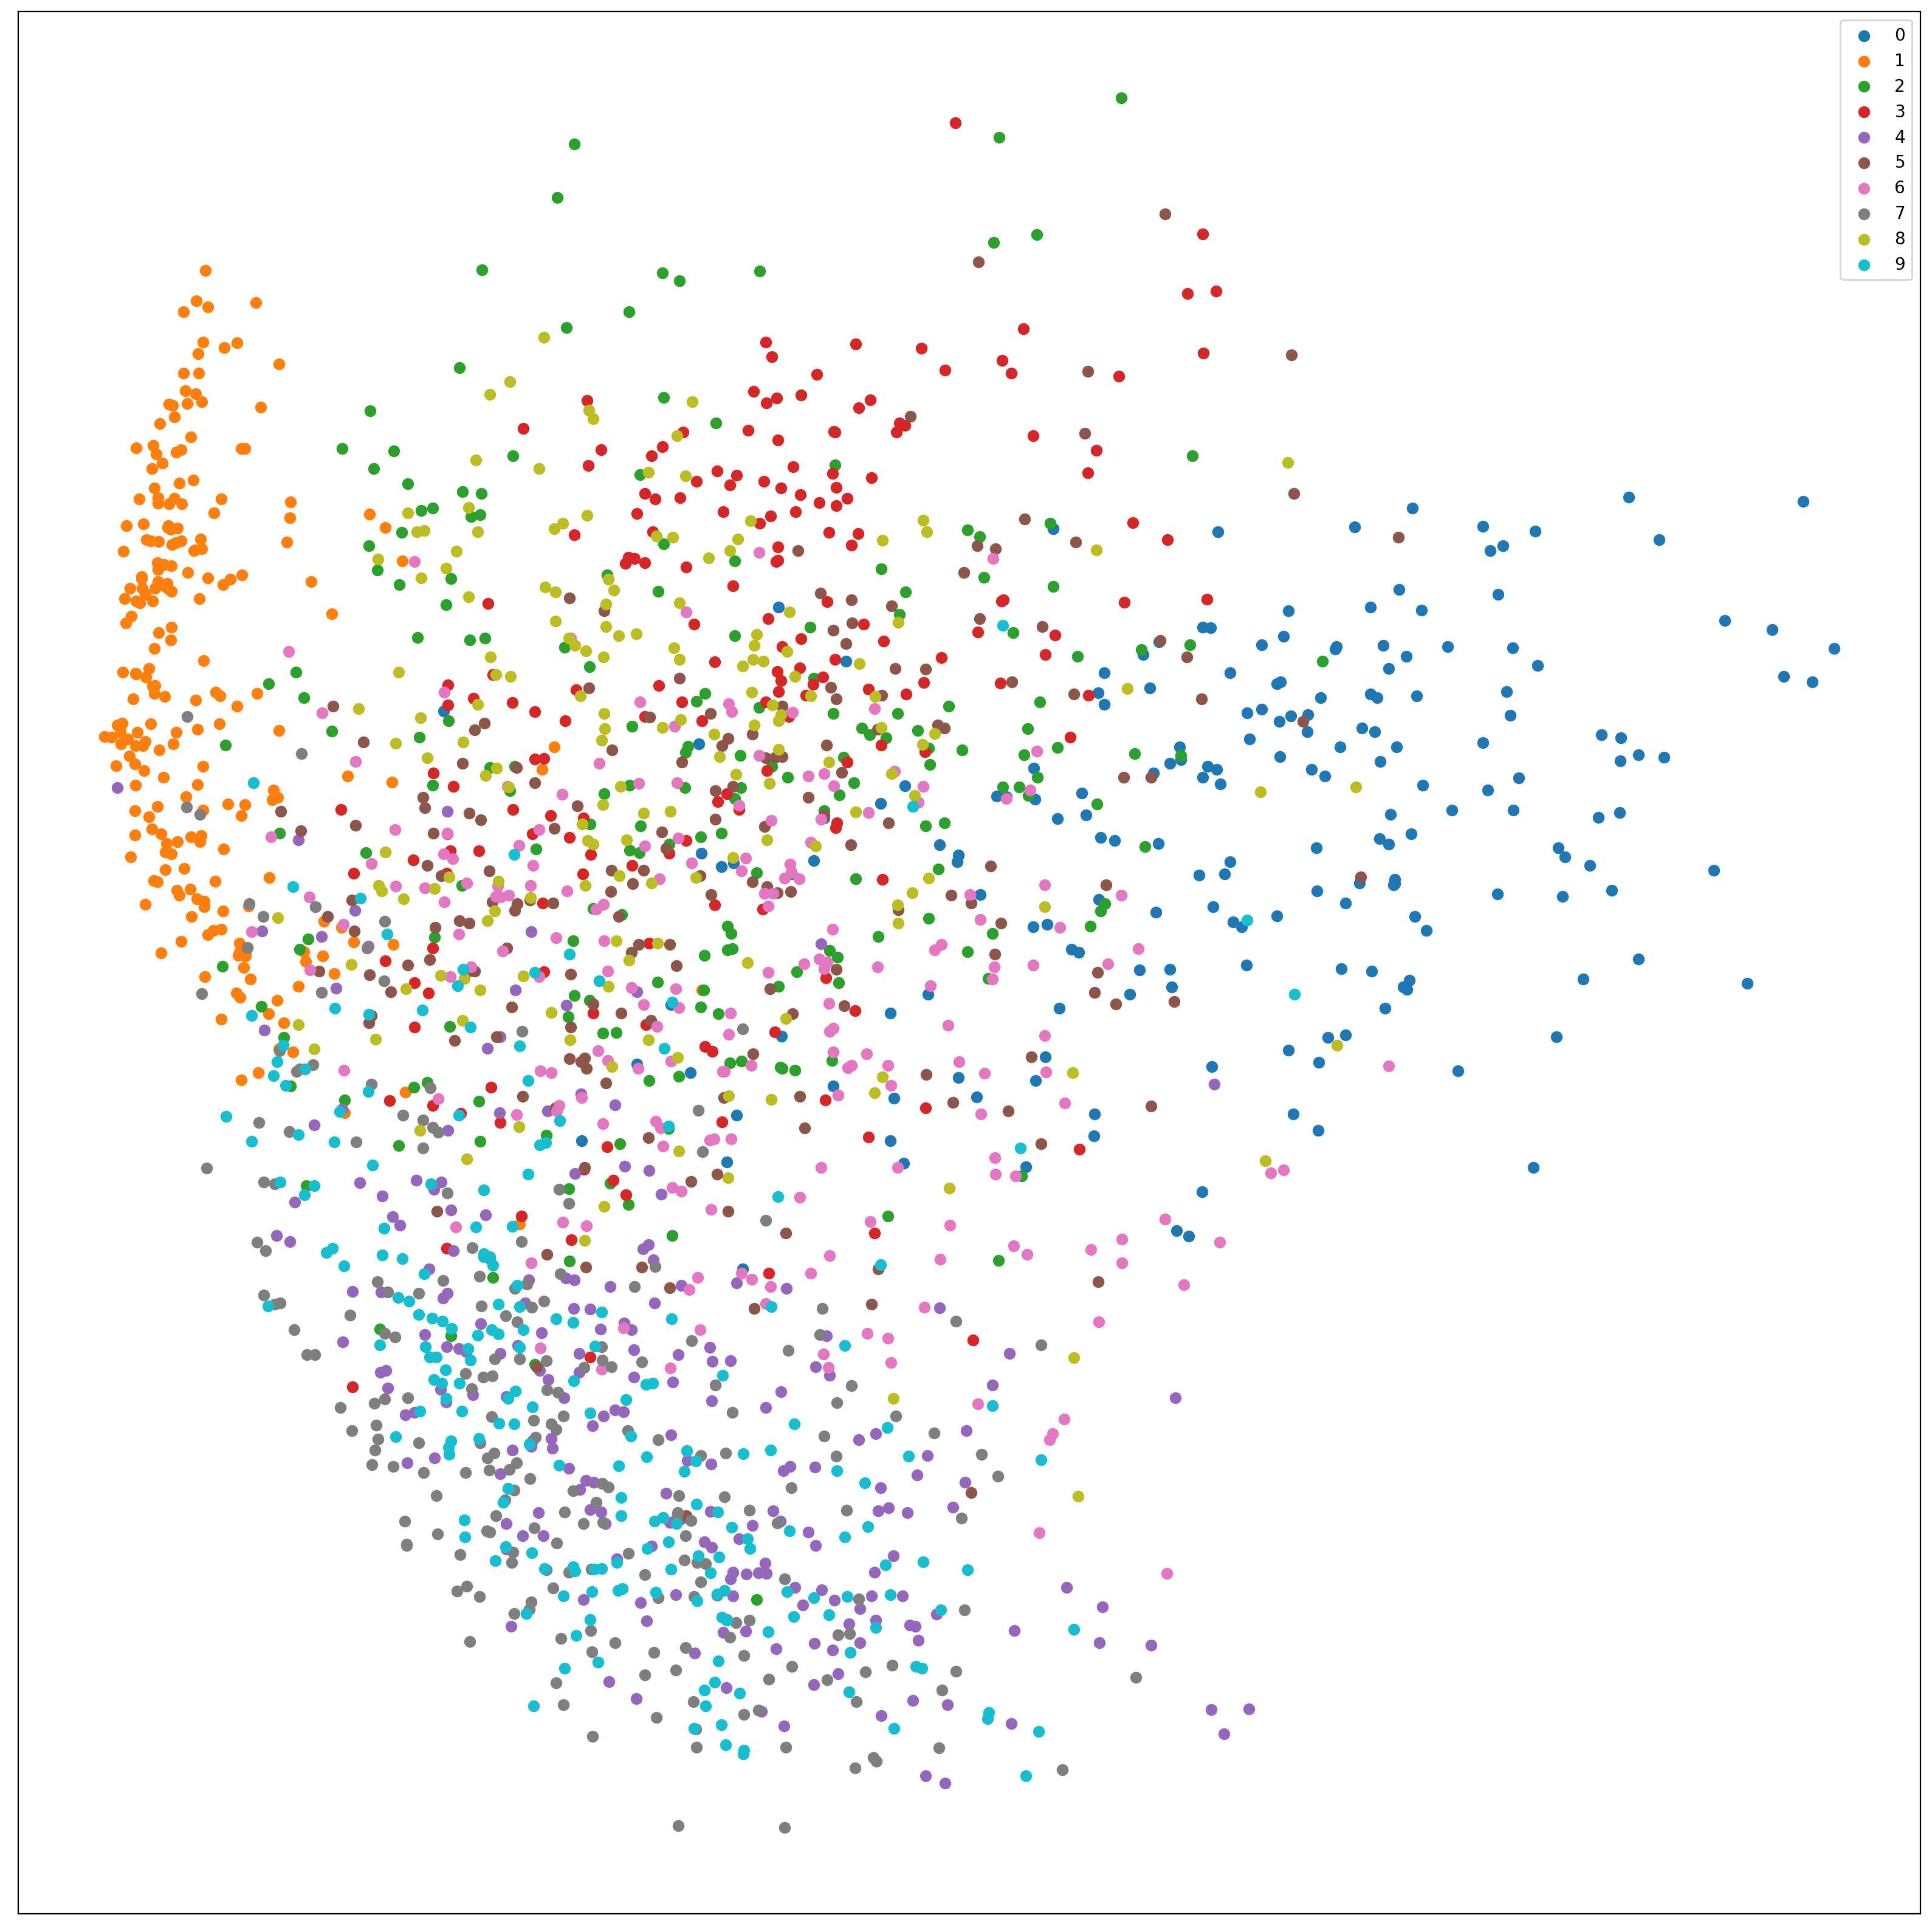

In [12]:
plot_2d_mnist_scatter(X_pca_embedded, y_small)

### T-distributed Stochastic Neighbour Embedding (T-SNE)

Make sure to have a look on this increadible [article on T-SNE](https://distill.pub/2016/misread-tsne/).

Use `T-SNE` function to embed `X_small` in two dimensions. Store the result in `X_tsne_embedded`. <BR>
Use:
 * `n_iter=500` argument to limit the number of T-SNE iterations, 
 * `verbose=2` argument to see a verbose output during embedding.

In [13]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_iter=500, verbose=2)
X_tsne_embedded = tsne.fit_transform(X_small)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.001s...
[t-SNE] Computed neighbors for 2000 samples in 1.096s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 2.528207
[t-SNE] Computed conditional probabilities in 0.164s
[t-SNE] Iteration 50: error = 77.8388367, gradient norm = 0.0137023 (50 iterations in 3.911s)
[t-SNE] Iteration 100: error = 75.6759109, gradient norm = 0.0004194 (50 iterations in 6.499s)
[t-SNE] Iteration 150: error = 75.6410217, gradient norm = 0.0007201 (50 iterations in 4.111s)
[t-SNE] Iteration 200: error = 75.5782852, gradient norm = 0.0006917 (50 iterations in 4.601s)
[t-SNE] Iteration 250: error = 75.5438614, gradient norm = 0.0002524 (50 iterations in 7.589s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.543861
[t-SNE] Iteration 300: error = 1.7901143, gradient norm = 0.0210764 (50 iterations in 4.906s)

In [14]:
X_tsne_embedded.shape

(2000, 2)

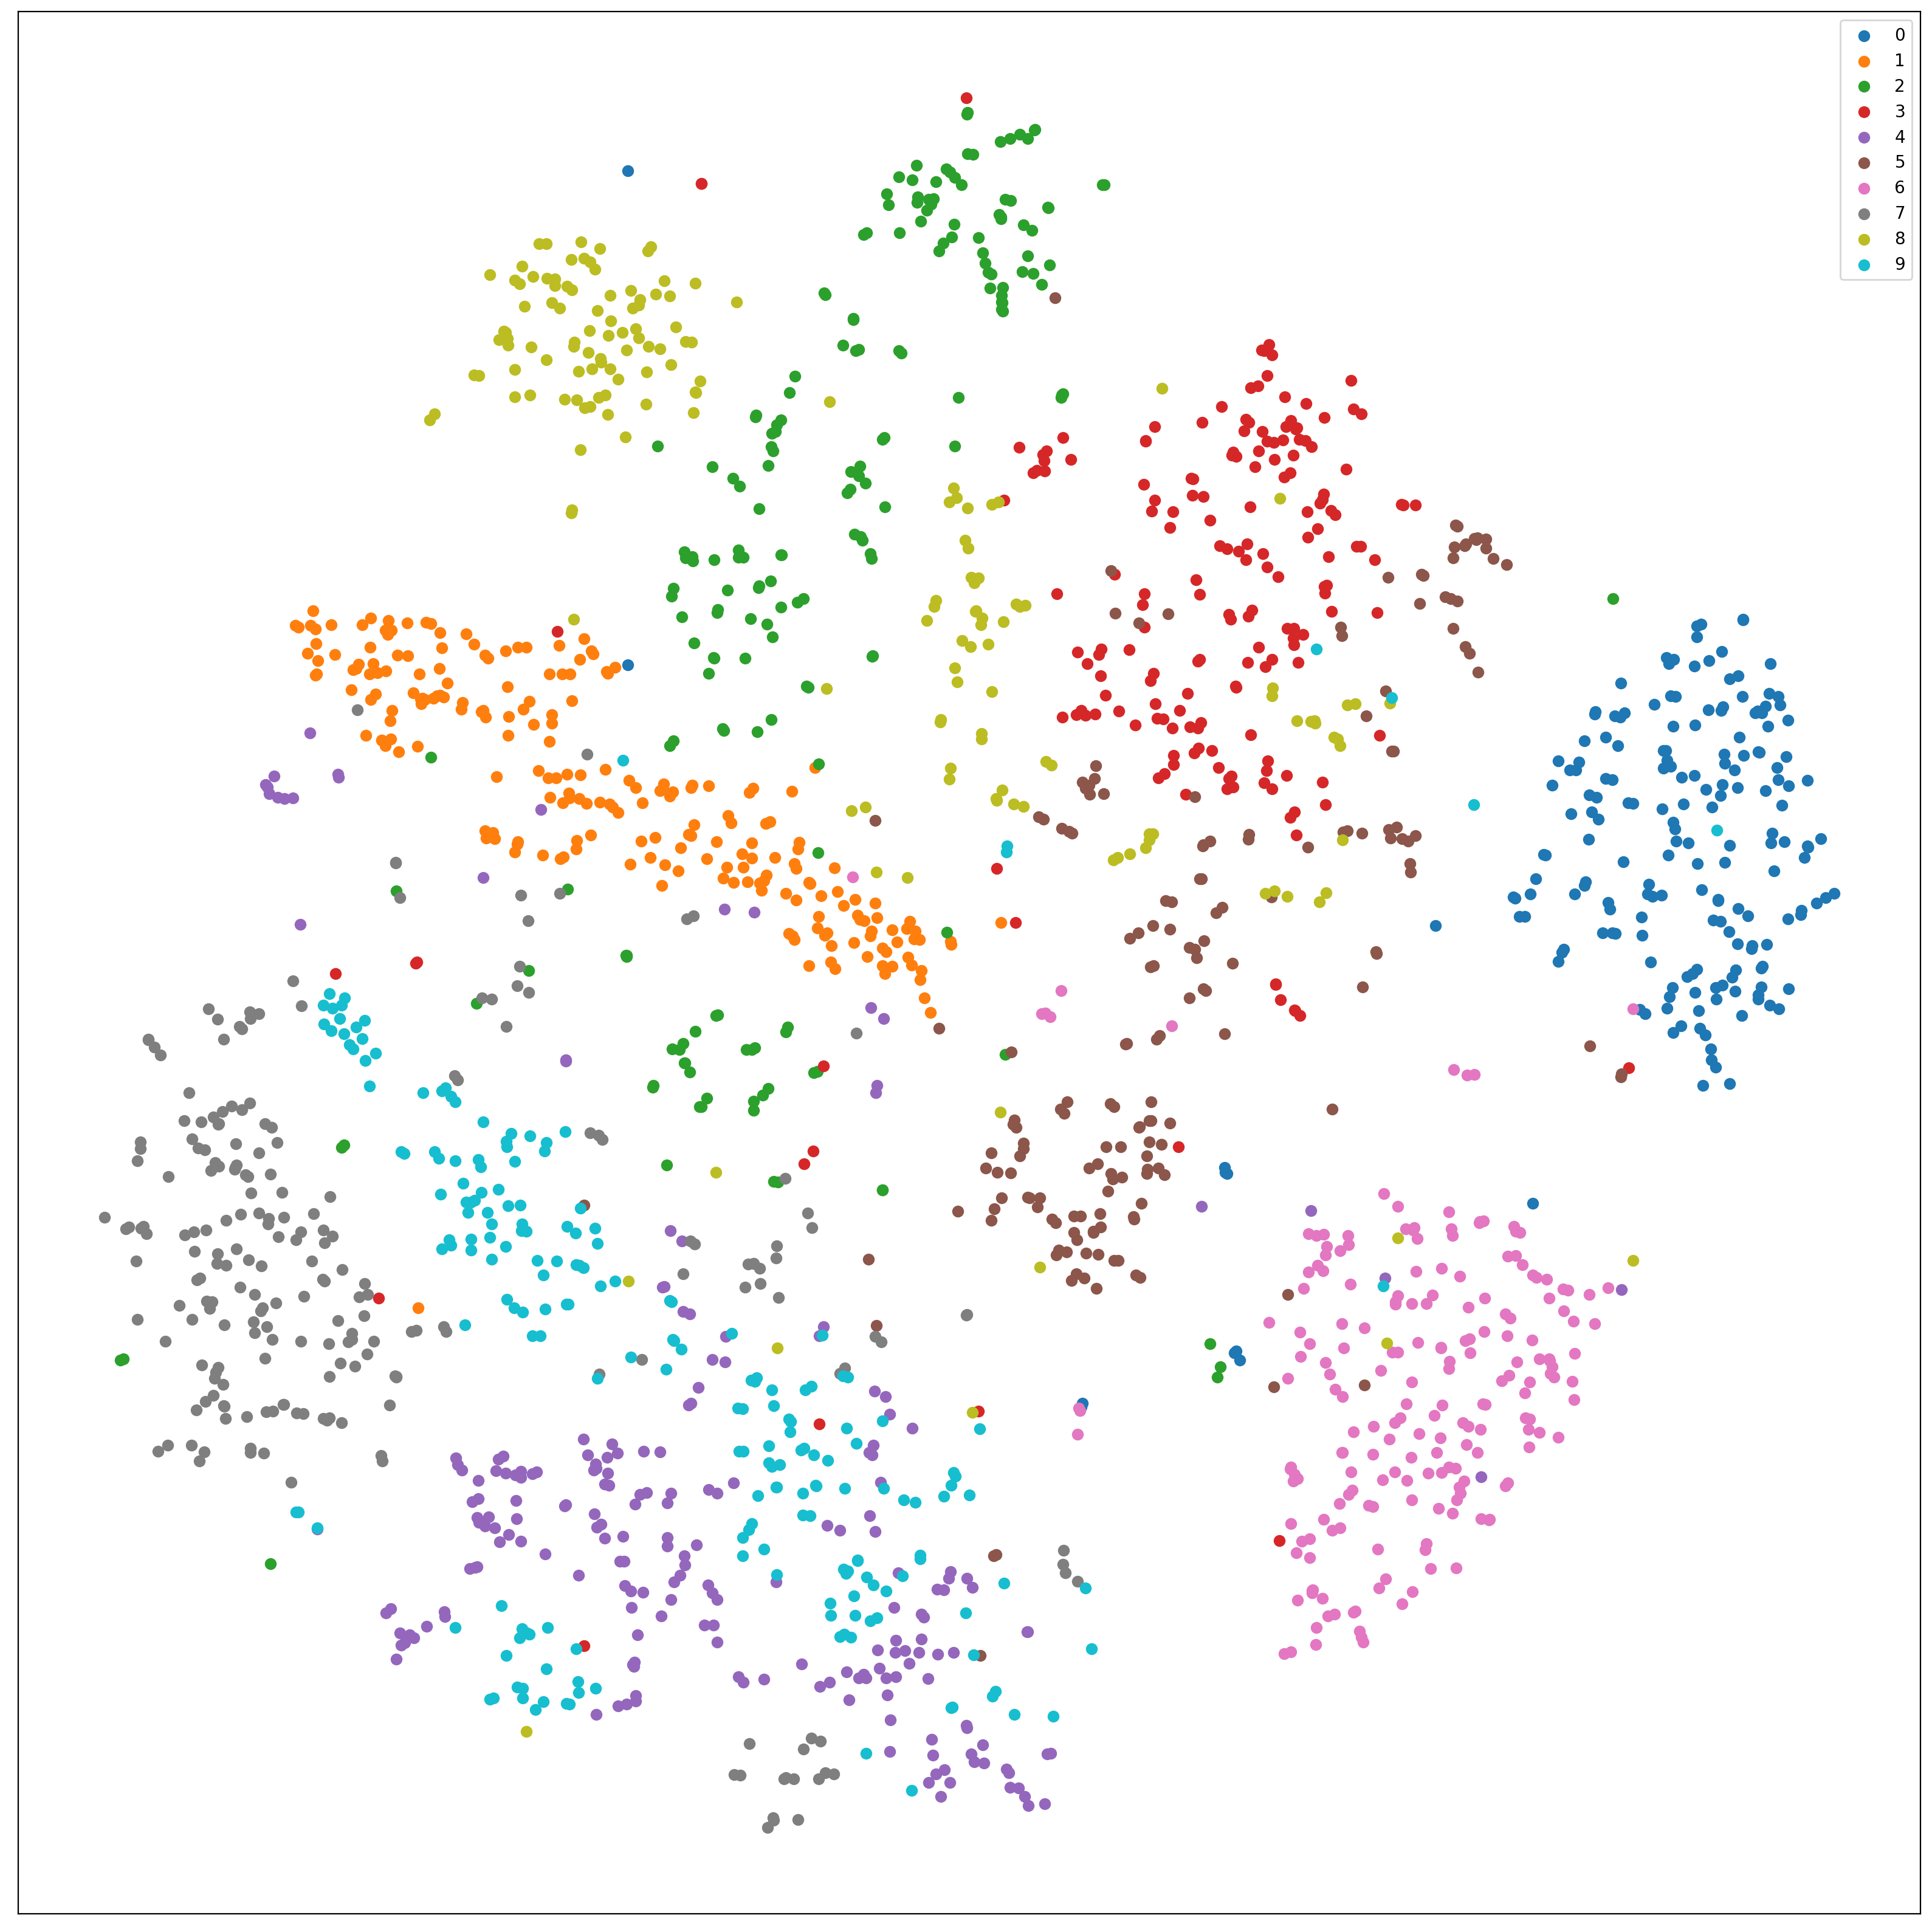

In [15]:
plot_2d_mnist_scatter(X_tsne_embedded, y_small)

### 3D interactive plots with plotly

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

def plot_3d_mnist_plotly_scatter(X, y):
    def make_trace(i):
        digit_indeces = y == i
        return go.Scatter3d(
            x=X[digit_indeces, 0],
            y=X[digit_indeces, 1],
            z=X[digit_indeces, 2],
            mode='markers',
            name=str(i),
            marker=dict(
                color=i,
                colorscale='Jet',
                size=4,
                symbol='circle',
                line=dict(
                    color='rgb(204, 204, 204)',
                    width=1
                )
            )
        )
        
    traces = [make_trace(i) for i in range(10)]
    
    layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))
    fig = go.Figure(data=traces, layout=layout)
    iplot(fig)

Use PCA function to embed `X_small` in **three** dimensions. Store the result in `X_3d_pca_embedded`.

In [ ]:
# pca_3d = PCA(???)
# X_3d_pca_embedded = ???


In [ ]:
X_3d_pca_embedded.shape

In [ ]:
plot_3d_mnist_plotly_scatter(X_3d_pca_embedded, y_small)

## Classification task

In [16]:
from sklearn.model_selection import train_test_split
SAMPLES_LIMIT=10000
X_train, X_test, y_train, y_test = train_test_split(X[:SAMPLES_LIMIT], y[:SAMPLES_LIMIT], test_size=0.2)

In [17]:
from sklearn import svm
classifier = svm.SVC(C=1, gamma=0.001)
classifier.fit(X_train, y_train)

SVC(C=1, gamma=0.001)

In [22]:
from sklearn import metrics

predicted = classifier.predict(X_test)

print("Classification report for classifier {}:\n{}\n".format(
    classifier, metrics.classification_report(y_test, predicted)))

Classification report for classifier SVC(C=1, gamma=0.001):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       189
           1       0.91      0.97      0.94       227
           2       0.91      0.86      0.88       216
           3       0.88      0.87      0.87       196
           4       0.89      0.95      0.92       183
           5       0.88      0.87      0.88       175
           6       0.93      0.97      0.95       200
           7       0.92      0.92      0.92       213
           8       0.96      0.83      0.89       199
           9       0.89      0.91      0.90       202

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000




Calculate and display the confision matrix for `predicted` and `y_test` (use metrics package).

In [25]:
import sklearn.metrics 
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, predicted)

print("Confusion matrix:\n{}".format(confusion_matrix))

Confusion matrix:
[[186   0   0   2   1   0   0   0   0   0]
 [  0 221   4   0   1   0   0   0   1   0]
 [  5   4 185   3   3   1   4   7   3   1]
 [  0   6   5 170   0   8   2   2   1   2]
 [  0   0   2   0 173   0   1   0   0   7]
 [  0   2   1  11   3 153   3   0   1   1]
 [  0   0   1   1   1   2 195   0   0   0]
 [  0   4   2   0   4   0   0 195   0   8]
 [  1   7   3   5   3   8   3   1 165   3]
 [  0   0   1   2   5   2   1   8   0 183]]
